# Problematicas de las plantas

## Objetivo
completar

### Importacion de bibliotecas

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torchvision import transforms, models
from torchvision import datasets, transforms
from PIL import Image

### Cargar y Procesar Datos

#### Cargar Datos

In [14]:
# Cargar Datos
ruta_entrenamiento = '../data/training/'
ruta_validacion = '../data/validation/'

train_transforms = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

validation_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

dataset_entrenamiento = datasets.ImageFolder(ruta_entrenamiento, transform=train_transforms)
dataset_validacion = datasets.ImageFolder(ruta_validacion, transform=validation_transforms)

#### Preprocesamiento de imagenes

In [25]:
cargado_entrenamiento = torch.utils.data.DataLoader(dataset_entrenamiento, batch_size=16, shuffle=True)
cargado_validacion = torch.utils.data.DataLoader(dataset_validacion, batch_size=32)

#### Visualizacion de Datos

In [29]:
# Funcion visualizar
def visualizar(image, ax=None, title=None):
    if ax is None:
        fig, ax = plt.subplots()
    
    image = image.numpy().transpose((1, 2, 0))
    
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    image = np.clip(image, 0, 1)
    
    ax.grid('off')
    ax.imshow(image)
    
    return ax

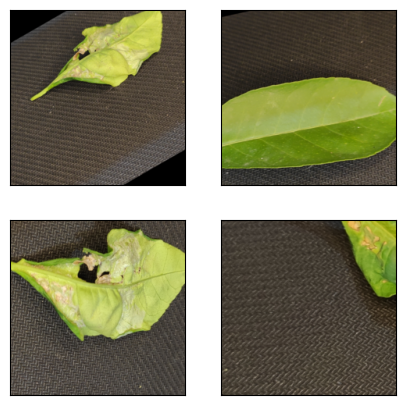

In [30]:
# Visualización de Datos
_, ax = plt.subplots(2, 2, figsize=(5, 5))
index = 0
ejemplos = enumerate(cargado_entrenamiento)
batch_idx, (example_data, example_targets) = next(ejemplos)

for i in range(2):
    for j in range(2):
        cell = ax[i][j]
        cell.set_xticks([])
        cell.set_yticks([])
        cell.grid(False)
        visualizar(example_data[index], cell)
        index += 1
        
plt.show()

### Construccion del Modelo

#### Nombre de hojas

In [32]:
nombres = {
    "0" : "Naranja Sana",
    "1" : "Naranja Enferma"
}
nombres

{'0': 'Naranja Sana', '1': 'Naranja Enferma'}

#### Definicion del clasificador

In [33]:
import torch.nn as nn
import torch.nn.functional as F

class ClasificadorHojaBinaria(nn.Module):
    def __init__(self):
        super(ClasificadorHojaBinaria, self).__init__()
        self.fc1 = nn.Linear(2048, 512, bias=True)
        self.fc2 = nn.Linear(512, 1, bias=True)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)

        return x


#### Definicion de la arquitectura del modelo

In [ ]:
# Definicion de la red neuronal

#### Compilacion del modelo

In [ ]:
# compilacion del modelo para entrenamiento

### Entrenamiento del modelo

#### Entrenando el modelo

In [ ]:
# Entrenando el modelo

#### Evaluacion del modelo

In [ ]:
# Evaluar modelo

### Resultados y Visualizacion

#### Visualizacion Metricas de Rendimiento

In [ ]:
# Visualizar métricas de rendimiento

#### Visualizar Predicciones

In [ ]:
# Visualizacion de predicciones